# Load multiple files and time adjustments

First the aerosoltools package is loaded

In [ ]:
import os;
import sys;

# Adjust this to the relative path from your notebook to the source directory
sys.path.insert(0, os.path.abspath('../../../src'));

In [ ]:
import aerosoltools as at
import matplotlib.pyplot as plt

The path to the folder containing relevant files is specified and passed to the load_data_from_folder function along with the load function to use when reading the data files. Here a keyword (search_word) can also be passed to only load e.g. .txt files or only load files containg the word "OPS".

In [49]:
folderpath = r"..\..\..\tests\data\OPS_data";
OPS_data = at.Load_data_from_folder(folderpath,at.Load_OPS_file,search_word = "OPS");

Loading: ..\..\..\tests\data\OPS_data\OPS_data1.csv
Loading: ..\..\..\tests\data\OPS_data\OPS_data2.csv
Loading: ..\..\..\tests\data\OPS_data\OPS_data3.csv
Loading: ..\..\..\tests\data\OPS_data\OPS_data4.csv


It is seen that the Load_data_from_folder function loaded 4 different files all from an OPS instrument. These are combined to a single data variable and sorted based on their time and dates. The files therefore do not have to be ordered when loading. However, the function will only combine files that come from the same instrument (it checks the instrument serial number - if given in the metadata).

We can now get an overview of the data by plotting a timeseries plot:

(<Figure size 1000x600 with 3 Axes>,
 array([<Axes: ylabel='dN, cm$^{-3}$'>,
        <Axes: xlabel='Time', ylabel='Dp, nm'>,
       dtype=object))

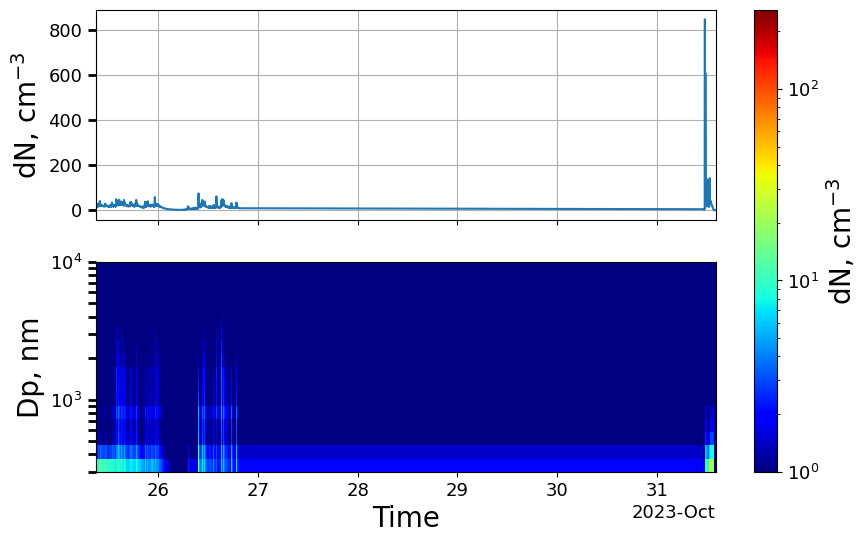

In [41]:
OPS_data.plot_timeseries(y_3d=(1,0));

We see that the data stretches over several days and generally has quite low levels.

Let's try to crop the data to only include data from the 25th and 26th, then shift the data by 120 minutes, smooth the data with a rolling window of 60 minutes width before rebinning the data into 2.5 hr timebins. Finally, we plot the mean particle size distribution from all time points of the treated dataset.

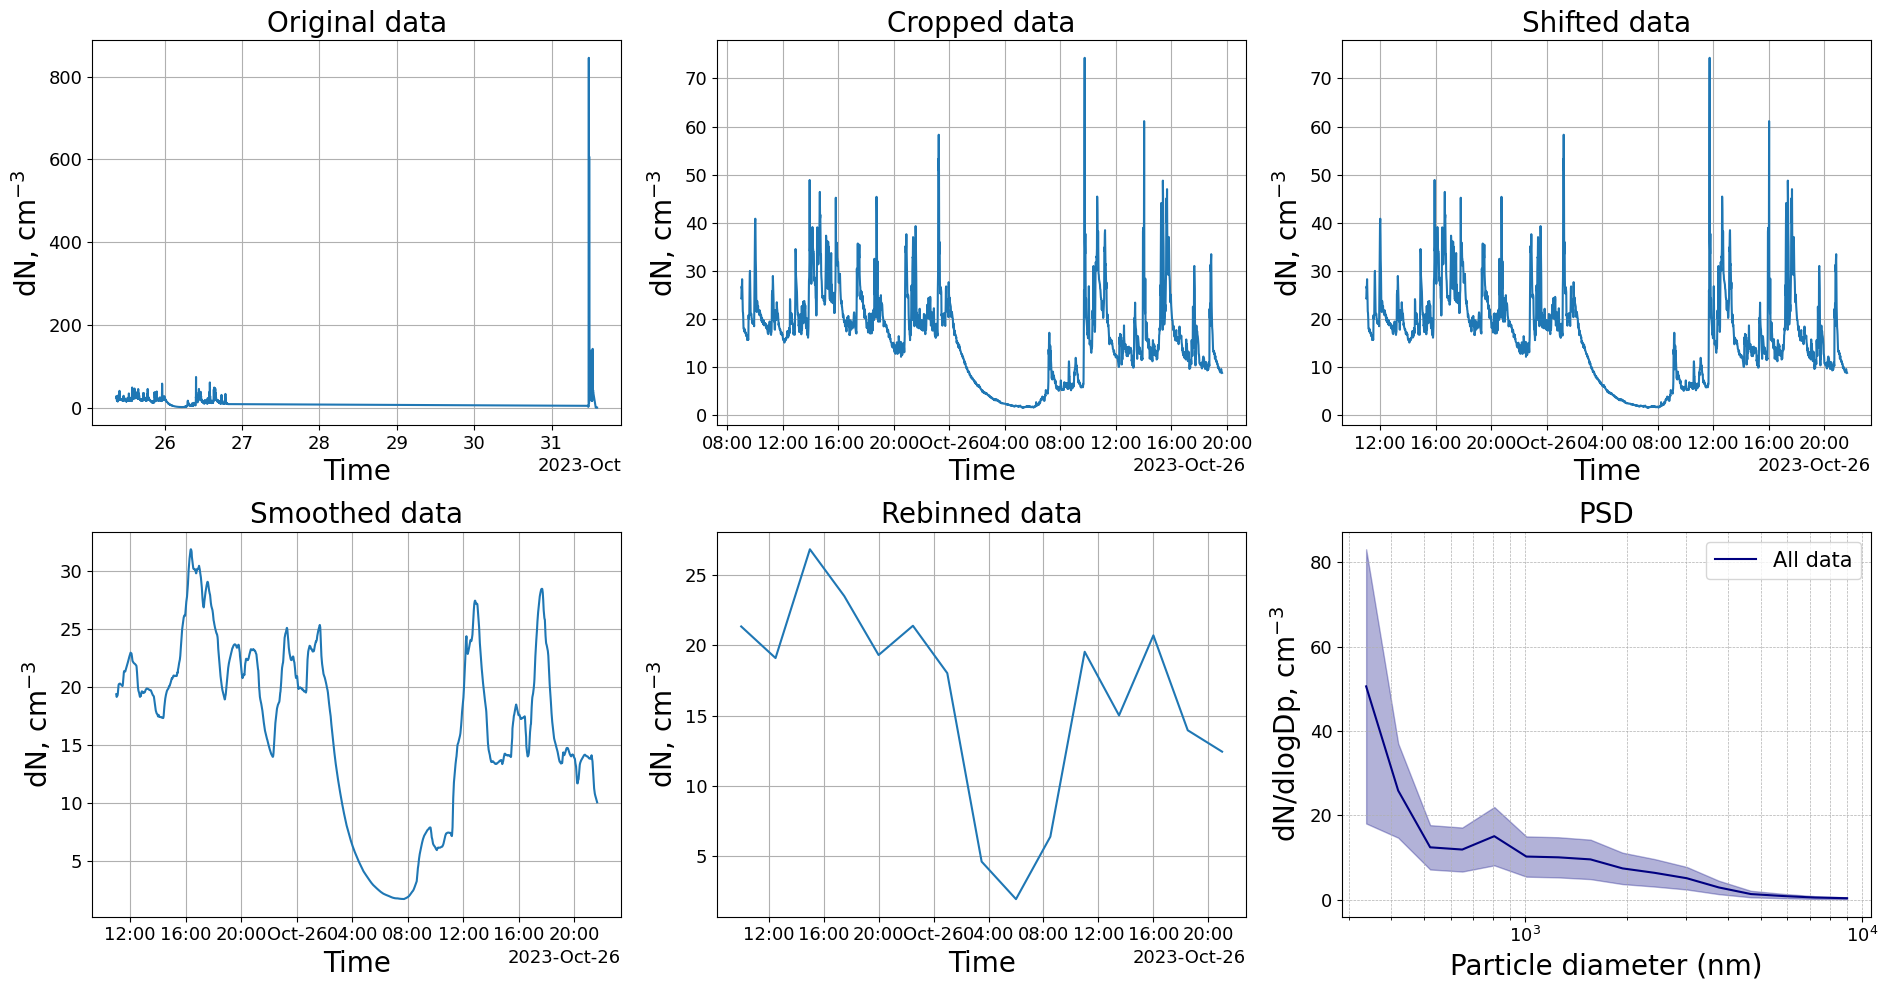

In [50]:
# Generate a plot
fig,axs = plt.subplots(nrows=2,ncols=3)

# Crop the data to only include datapoint after the 1st of April at 8:00:00

# Plot the original data and mark the activities
OPS_data.plot_total_conc(axs[0,0])
axs[0,0].set_title("Original data")

# Smooth the data by taking the mean of every 3 datapoints. This does not rebin the data, it is just smoothing
OPS_data.timecrop(start = "2023-10-25 08:00:00",end = "2023-10-26 22:00:00")
OPS_data.plot_total_conc(axs[0,1])
axs[0,1].set_title("Cropped data")

# Shift the time 30 minutes
OPS_data.timeshift(minutes=120)
OPS_data.plot_total_conc(axs[0,2])
axs[0,2].set_title("Shifted data")

# Crop the data to only include datapoint after the 1st of April at 8:00:00
OPS_data.timesmooth(60,method="mean")
OPS_data.plot_total_conc(axs[1,0])
axs[1,0].set_title("Smoothed data")

# Rebin the data to 2.5h bins. There are also options to specify minutes or seconds instead of hours
OPS_data.timerebin("2.5h")
OPS_data.plot_total_conc(axs[1,1])
axs[1,1].set_title("Rebinned data")

OPS_data.plot_psd(normalize=True, ax = axs[1,2])
axs[1,2].set_title("PSD")
plt.tight_layout()